# **Setup**

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot as plt
from sklearn.svm import OneClassSVM

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.metrics import plot_roc_curve
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler


import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('preprocessed_spam_ham_phishing.csv')

In [4]:
df.columns

Index(['hops', 'missing_subject', 'missing_to', 'missing_content-type',
       'missing_mime-version', 'missing_x-mailer',
       'missing_content-transfer-encoding', 'missing_x-mimeole',
       'missing_x-priority', 'missing_list-id', 'missing_lines',
       'missing_x-virus-scanned', 'missing_status', 'missing_content-length',
       'missing_precedence', 'missing_delivered-to',
       'missing_list-unsubscribe', 'missing_list-subscribe',
       'missing_list-post', 'missing_list-help', 'missing_x-msmail-priority',
       'missing_x-spam-status', 'missing_sender', 'missing_errors-to',
       'missing_x-beenthere', 'missing_list-archive', 'missing_reply-to',
       'missing_x-mailman-version', 'missing_x-miltered', 'missing_x-uuid',
       'missing_x-virus-status', 'missing_x-spam-level',
       'missing_x-spam-checker-version', 'missing_references',
       'missing_in-reply-to', 'missing_user-agent', 'missing_thread-index',
       'missing_cc', 'missing_received-spf', 'missing_x-orig

In [5]:
# This list is based on the top features from a permutation feature importance test with SVM, kernel type = poly, degree 6.

new_small_feature_list = ['missing_x-beenthere',
'domain_match_errors-to_sender',
'missing_list-archive',
'missing_x-mailman-version',
'str_precedence_list',
'missing_errors-to',
'missing_sender',
'missing_x-spam-checker-version',
'str_return-path_bounce',
'missing_references',
'domain_match_from_return-path',
'missing_delivered-to',
'missing_in-reply-to',
'missing_list-id',
'missing_x-spam-status',
'missing_list-post',
'missing_list-help',
'missing_list-subscribe',
'domain_match_to_received',
'number_replies',
'missing_precedence',
'domain_match_message-id_return-path',
'missing_list-unsubscribe',
'missing_mailing-list',
'missing_x-spam-check-by',
'missing_received-spf',
'domain_match_errors-to_from',
'missing_x-original-to',
'hops',
'domain_match_return-path_reply-to',
'domain_match_references_in-reply-to',
'domain_match_errors-to_reply-to',
'domain_match_sender_from',
'conseq_received_date',
'domain_match_errors-to_message-id',
'missing_reply-to',
'conseq_num_received_is_one',
'domain_match_reply-to_to',
'missing_cc',
'missing_x-virus-scanned',
'domain_match_from_reply-to',
'domain_match_message-id_sender',
'conseq_received_good',
'missing_mime-version',
'domain_match_to_from',
'missing_lines',
'missing_status',
'missing_content-length',
'content-encoding-val',
'domain_match_message-id_reply-to',
'num_recipients_cc',
'str_content-encoding_empty',
'missing_content-transfer-encoding',
'domain_match_to_message-id',
'str_from_chevron',
'str_to_chevron',
'missing_x-mailing-list',
'domain_match_references_to',
'domain_match_to_in-reply-to',
'length_from',
'conseq_received_bad',
'domain_match_message-id_from',
'lines',
'content-length',
'missing_content-disposition',
'missing_user-agent',
'missing_x-mimeole',
'time_zone',
'missing_x-priority',
'x-priority',
'span_time',
'missing_content-type',
'missing_domainkey-signature',
'missing_x-mailer',
'missing_x-msmail-priority',
'missing_thread-index',
'email_match_from_reply-to',
'str_message-ID_dollar',
'str_content-type_texthtml',
'num_recipients_to',
'missing_x-spam-level',
'domain_match_references_reply-to',
'domain_val_message-id',
'missing_importance',
'date_comp_date_received',
'missing_x-virus-status',
'str_from_question',
'str_to_empty',
'missing_to', 'label']

df = df[new_small_feature_list]

**Remove phishing emails, only consider ham and spam:**

In [6]:
df = df[df['label'] != 2]
print(df.shape)

(75419, 90)


# **Testing:**

**Novelty detection (One Class SVM):**

**Creating a training set composed of only ham emails (10,000 for the training set, rest for testing):**

In [7]:
df_ham = df[df['label'] == 0]
df_spam = df[df['label'] == 1]
print(df_ham.shape)
print(df_spam.shape)

(25220, 90)
(50199, 90)


In [8]:
df_ham_train = df_ham.iloc[0:20000]
df_ham_test = df_ham.iloc[20000:]

df_ham_test_Y = df_ham_test['label']
df_ham_train_Y = df_ham_train['label']

df_ham_train_X = df_ham_train.drop('label', axis=1)
df_ham_test_X = df_ham_test.drop('label', axis=1)

feature_list = df_ham_train_X.columns

print(df_ham_test_Y.shape)
print(df_ham_train_X.shape)
print(df_ham_test_X.shape)

(5220,)
(20000, 89)
(5220, 89)


In [9]:
df_spam_test = df_spam.iloc[0:5220]

df_spam_test_Y = df_spam_test['label']
df_spam_test_X = df_spam_test.drop('label', axis=1)

print(df_spam_test_Y.shape)
print(df_spam_test_X.shape)

(5220,)
(5220, 89)


Training just uses ham. Testing uses 5220 ham and 5220 spam emails. Combing the ham and spam emails to make the test set:

In [10]:
df_test_X = pd.concat([df_spam_test_X, df_ham_test_X], ignore_index=True)
df_test_Y = pd.concat([df_spam_test_Y, df_ham_test_Y], ignore_index=True)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df_test_X)
df_test_X = scaler.transform(df_test_X)
df_test_X = pd.DataFrame(df_test_X, columns=feature_list)

scaler = StandardScaler()

scaler.fit(df_ham_train_X)
df_ham_train_X = scaler.transform(df_ham_train_X)
df_ham_train_X = pd.DataFrame(df_ham_train_X, columns=feature_list)

In [12]:
pca = PCA(n_components=10)

#train_X = pca.fit_transform(df_ham_train_X)
#test_X = pca.fit_transform(df_test_X)

In [13]:
test_X = df_test_X
train_X = df_ham_train_X

One class SVM predicts 1 for normal class and -1 for anomaly class, so need to match the labels to those:

In [14]:
df_test_Y = pd.DataFrame(df_test_Y, columns=['label'])

df_test_Y.loc[df_test_Y['label'] == 1, 'label'] = -1
df_test_Y.loc[df_test_Y['label'] == 0, 'label'] = 1


df_train_Y = pd.DataFrame(df_ham_train_Y, columns=['label'])

df_train_Y.loc[df_train_Y['label'] == 1, 'label'] = -1
df_train_Y.loc[df_train_Y['label'] == 0, 'label'] = 1

In [15]:
df_test_Y.value_counts()

label
 1       5220
-1       5220
dtype: int64

Top features sorted:
Feature: missing_x-beenthere, Score: 0.229475
Feature: domain_match_errors-to_sender, Score: 0.229475
Feature: missing_list-archive, Score: 0.228825
Feature: missing_x-mailman-version, Score: 0.225350
Feature: str_precedence_list, Score: 0.221950
Feature: missing_errors-to, Score: 0.221400
Feature: missing_sender, Score: 0.207725
Feature: missing_x-spam-checker-version, Score: 0.199225
Feature: str_return-path_bounce, Score: 0.188125
Feature: missing_references, Score: 0.173600
Feature: domain_match_from_return-path, Score: 0.170925
Feature: missing_delivered-to, Score: 0.170800
Feature: missing_in-reply-to, Score: 0.170450
Feature: missing_list-id, Score: 0.169075
Feature: missing_x-spam-status, Score: 0.168500
Feature: missing_list-post, Score: 0.168350
Feature: missing_list-help, Score: 0.168350
Feature: missing_list-subscribe, Score: 0.167025
Feature: domain_match_to_received, Score: 0.158100
Feature: number_replies, Score: 0.156250
Feature: missing_precedence,

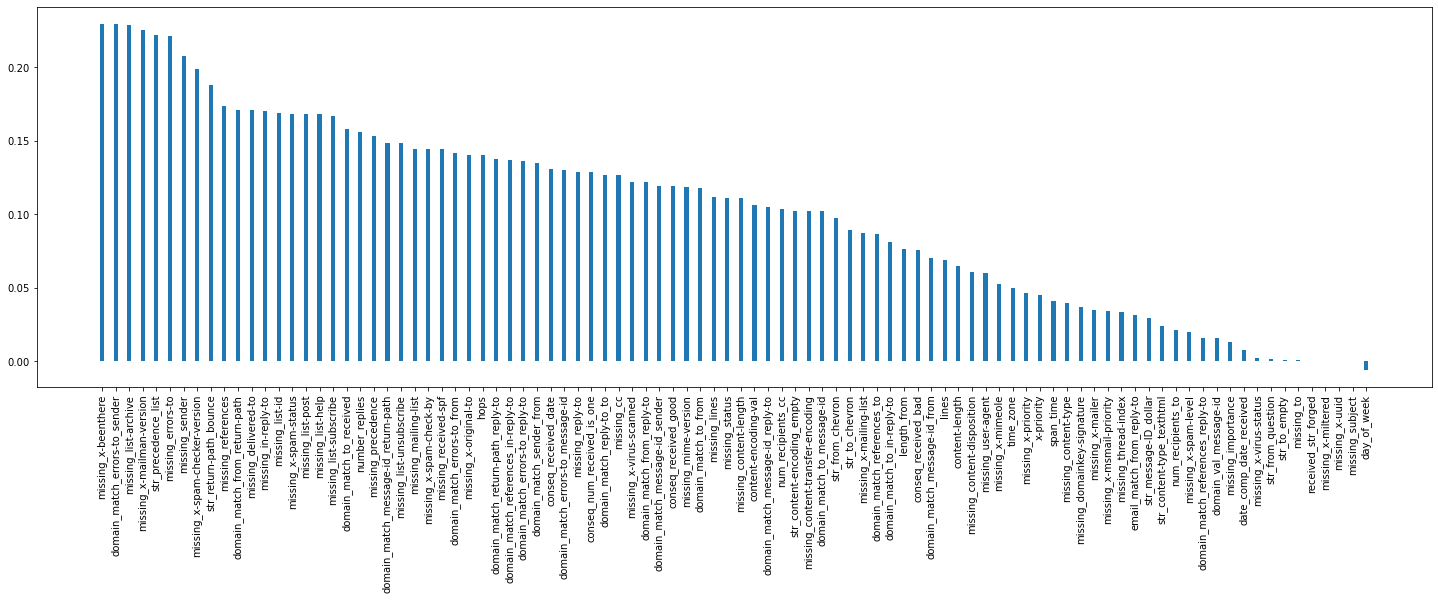

In [15]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

model = OneClassSVM(gamma=0.01, nu=0.34, kernel='poly', degree=6, tol=0.001, coef0=0, shrinking=True)
model.fit(train_X, df_train_Y)

results = permutation_importance(model, train_X, df_train_Y, 
                                 scoring='accuracy', n_repeats=2, n_jobs=-1)
importance = results.importances_mean

fig = plt.figure(figsize =(25, 7))

importances_sorted = sorted(zip(importance, feature_list), reverse=True)
feature_sorted, importance_sorted = zip(*importances_sorted)

perm_svm_feature_importances = importance_sorted

print("Top features sorted:")
for x, imp in zip(feature_sorted, importance_sorted):
  print('Feature: %s, Score: %f' % (imp, x))

plt.xticks(rotation='vertical')
plt.bar([x for x in importance_sorted], feature_sorted, width=0.3)
plt.show()

In [16]:
counter = 0
for x, imp in zip(feature_sorted, importance_sorted):
  counter += 1
  print('\'' + imp + '\',')
  if counter == 100:
    break

'missing_x-beenthere',
'domain_match_errors-to_sender',
'missing_list-archive',
'missing_x-mailman-version',
'str_precedence_list',
'missing_errors-to',
'missing_sender',
'missing_x-spam-checker-version',
'str_return-path_bounce',
'missing_references',
'domain_match_from_return-path',
'missing_delivered-to',
'missing_in-reply-to',
'missing_list-id',
'missing_x-spam-status',
'missing_list-post',
'missing_list-help',
'missing_list-subscribe',
'domain_match_to_received',
'number_replies',
'missing_precedence',
'domain_match_message-id_return-path',
'missing_list-unsubscribe',
'missing_mailing-list',
'missing_x-spam-check-by',
'missing_received-spf',
'domain_match_errors-to_from',
'missing_x-original-to',
'hops',
'domain_match_return-path_reply-to',
'domain_match_references_in-reply-to',
'domain_match_errors-to_reply-to',
'domain_match_sender_from',
'conseq_received_date',
'domain_match_errors-to_message-id',
'missing_reply-to',
'conseq_num_received_is_one',
'domain_match_reply-to_to',
'mi

# **Testing**:

In [16]:
nu_list = [0.1, 0.15, 0.05]
gamma_list = [0.1]
degree_list = [6]
tol_list = [0.01, 0.05, 0.005]
coef0_list = [0]
shrinking_list = [True]


best_acc = 0
best_set = []

for v1 in nu_list:
    for v2 in gamma_list:
        for v4 in tol_list:
            for v5 in coef0_list:
                for v6 in shrinking_list:
                    for v3 in degree_list:
                        clf = OneClassSVM(gamma=v2, nu=v1, kernel='poly', degree=v3, tol=v4, coef0=v5, shrinking=v6).fit(train_X)

                        predictions = clf.predict(test_X)

                        acc = accuracy_score(df_test_Y, predictions)*100

                        if acc > best_acc:
                            best_acc = acc
                            best_set = [v1, v2, v3, v4, v5, v6]
                            print('\nnu: ', v1, 'gamma:', v2, 'degree:', v3, 'tol:', v4, 'coef0:', v5, 'shrinking:', v6)
                            print("Accuracy: ", acc, "%")
                            print("AUC: ", roc_auc_score(df_test_Y, predictions))
                            print("F1: ", f1_score(df_test_Y, predictions, average='macro'))
                            print("Recall: ", recall_score(df_test_Y, predictions, average='macro'))
                            print("Precision: ", precision_score(df_test_Y, predictions, average='macro'))
                            tn, fp, fn, tp = confusion_matrix(df_test_Y, predictions).ravel()
                            print("Confusion Matrix:\n", tn, fp, fn, tp)


nu:  0.1 gamma: 0.1 degree: 6 tol: 0.01 coef0: 0 shrinking: True
Accuracy:  89.75095785440614 %
AUC:  0.8975095785440612
F1:  0.8964902841637659
Recall:  0.8975095785440612
Precision:  0.9138092440817045
Confusion Matrix:
 5203 17 1053 4167


In [44]:
clf = OneClassSVM(gamma='auto', nu=0.1, kernel='poly', degree=6, tol=0.01, coef0=0.03, shrinking=True).fit(train_X)

predictions = clf.predict(test_X)

acc = accuracy_score(df_test_Y, predictions)*100
print("Accuracy: ", acc, "%")
print("AUC: ", roc_auc_score(df_test_Y, predictions))
print("F1: ", f1_score(df_test_Y, predictions, average='macro'))
print("Recall: ", recall_score(df_test_Y, predictions, average='macro'))
print("Precision: ", precision_score(df_test_Y, predictions, average='macro'))
tn, fp, fn, tp = confusion_matrix(df_test_Y, predictions).ravel()
print("Confusion Matrix:\n", tn, fp, fn, tp)

Accuracy:  89.80842911877394 %
AUC:  0.8980842911877392
F1:  0.8970825338382158
Recall:  0.8980842911877394
Precision:  0.9142113603818616
Confusion Matrix:
 5203 17 1047 4173


In [15]:
clf = OneClassSVM(gamma='auto', nu=0.7, kernel='rbf').fit(train_X)

predictions = clf.predict(test_X)

print("Accuracy: ", accuracy_score(df_test_Y, predictions)*100, "%")
print("AUC: ", roc_auc_score(df_test_Y, predictions))
print("F1: ", f1_score(df_test_Y, predictions, average='macro'))
print("Recall: ", recall_score(df_test_Y, predictions, average='macro'))
print("Precision: ", precision_score(df_test_Y, predictions, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(df_test_Y, predictions))

Accuracy:  14.221419185282521 %
AUC:  0.14221419185282524
F1:  0.1418661859037348
Recall:  0.14221419185282524
Precision:  0.14163286575833522
Confusion Matrix:
 [[ 1858 13362]
 [12749  2471]]


In [31]:
clf = OneClassSVM(gamma='auto', nu=0.8, kernel='sigmoid').fit(train_X)

predictions = clf.predict(test_X)

print("Accuracy: ", accuracy_score(df_test_Y, predictions)*100, "%")
print("AUC: ", roc_auc_score(df_test_Y, predictions))
print("F1: ", f1_score(df_test_Y, predictions, average='macro'))
print("Recall: ", recall_score(df_test_Y, predictions, average='macro'))
print("Precision: ", precision_score(df_test_Y, predictions, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(df_test_Y, predictions))

Accuracy:  37.877792378449406 %
AUC:  0.37877792378449404
F1:  0.3090172824258485
Recall:  0.37877792378449404
Precision:  0.29666376482525636
Confusion Matrix:
 [[  929 14291]
 [ 4619 10601]]
